# Assignment 10

## Try to submit as an HTML file

<font size = "5">
Print your name below

In [ ]:
print("Eric Zou")

<font size = "5">

Import the "pandas" and "matplotlib.pyplot" libraries.

In [1]:
# Write your answer here:

import pandas as pd
import matplotlib.pyplot as plt


<font size = "5">

In this assignment, we will work with a World Bank <br>
dataset on the proportion of urban population across <br>
countries, from 2016-2020.

- This is an example of a "panel"/"longitudinal" dataset <br>
 which contains information about the same unit (country) <br>
 over time.
 - This is in "long" format (see Lecture 22)

<font size = "5">

(a) Import data and parse dates 

<font size = "3">


- Import "data_raw/wdi_long.csv"
- Create a new column called "date" which uses ```pd.to_datetime(...,format = ...)``` <br>
to convert year to a date format
- To get full points use wild cards to establish the format.

Hint: See Lecture 21 for information about wild cards

In [2]:
# Write your own code

long = pd.read_csv("data_raw/wdi_long.csv")
long["date"] = pd.to_datetime(long["year"], format = '%Y')

display(long["date"])

0      2016-01-01
1      2016-01-01
2      2016-01-01
3      2016-01-01
4      2016-01-01
          ...    
1080   2020-01-01
1081   2020-01-01
1082   2020-01-01
1083   2020-01-01
1084   2020-01-01
Name: date, Length: 1085, dtype: datetime64[ns]

<font size = "5">

(b)  Sort by two columns

<font size = "3">

- Create a new dataset "data_sorted" that sorts by "country_name" and "date"

HINT: Include a list of column names as the main sorting argument.

In [3]:
# Write your own code


data_sorted = long.sort_values(['country_name', 'date'], ascending = True)



<font size = "5">

(c) Compute grouped time differences

<font size = "3">

**Example**
- Each country has data for multiple dates
- The following code calculates the time-difference between each date <br>
```
(data_sorted.groupby("country_name")["date"]
            .diff())
```

**Instructions**:
- Now, instead of ["date"] use ```["prop_urban"]```
- Store the result in a new column called "diff_prop_urban"
- This adds a new column with the country-level changes in <br>
the urban propulaton each year

HINT: Check Lecture 22 for using ```.diff()``` <br>
Note: Using ".groupby()" is important so that each country is analyzed <br>
separately.

In [11]:
# Write your own code

long["diff_prop_urban"] = data_sorted.groupby("country_name")["date"].diff()

display(long["diff_prop_urban"])


0           NaT
1           NaT
2           NaT
3           NaT
4           NaT
         ...   
1080   365 days
1081   365 days
1082   365 days
1083   365 days
1084   365 days
Name: diff_prop_urban, Length: 1085, dtype: timedelta64[ns]

<font size = "5">

(d) Plot time series for single country

<font size = "3">

- Use ".query()" to subset "data_sorted" for rows that satisfy

$\quad$  ```  'country_name == "United States"' ```
 
- Produce a line plot with the evolution of "prop_urban" over time in the <br>
United States



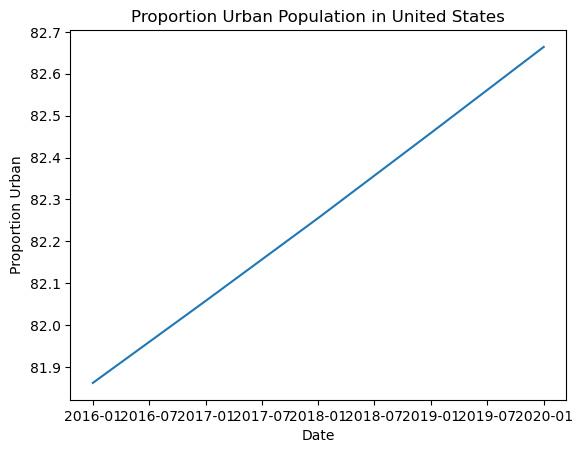

In [20]:
# Write your own code

us_data = data_sorted.query('country_name == "United States"')

plt.plot(us_data['date'], us_data['prop_urban'])
plt.title('Proportion Urban Population in United States')
plt.xlabel('Date')
plt.ylabel('Proportion Urban')
plt.show()


<font size = "5">

(e) Convert to wide format

<font size = "3">

- Convert "data_sorted" from wide to long, using the following arguments: <br>
```
   index = 'country_name'
   columns = 'year'
   values =  'prop_urban'
```
- Display the dataset to check that it is in wide format

HINT: See Lecture 22 for details



In [19]:
# Write your own code

long_wide = (pd.pivot(long,
                    index = 'country_name',
                    columns = 'year',
                    values = 'prop_urban'))

display(long_wide)


year,2016,2017,2018,2019,2020
country_name,,,,,
Afghanistan,25.020,25.250,25.495,25.754,26.026
Albania,58.421,59.383,60.319,61.229,62.112
Algeria,71.459,72.052,72.629,73.189,73.733
American Samoa,87.198,87.170,87.153,87.147,87.153
Andorra,88.248,88.150,88.062,87.984,87.916
...,...,...,...,...,...
Virgin Islands (U.S.),95.480,95.603,95.721,95.832,95.939
West Bank and Gaza,75.628,75.894,76.164,76.440,76.719
"Yemen, Rep.",35.394,36.016,36.642,37.273,37.908
